In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import customized_obj as cus_obj
import lightgbm as lgbm
import xgboost as xgb


In [169]:
k = 1500
X = np.random.uniform(-1, 1, [k, 20])
y_true = (np.random.normal(0,0.3,k)+1)*\
         (np.random.normal(0,0.3,k)+np.random.uniform(-0.25,0.27,k)
          +(1+np.random.normal(0,0.5,k)+np.random.uniform(-0.2,0.2,k))*X[:, 0] 
          + 2 * (1+np.random.normal(0,0.3,k)+np.random.uniform(-0.3,0.3,k)) * np.power(X[:, 1]+np.random.normal(0,0.21,k), 2)
          - (1+np.random.normal(0,0.4,k)+np.random.uniform(-0.2,0.2,k)) * np.power(X[:, 2]+np.random.normal(0,0.22,k), 3))
y_true = pd.Series((y_true - np.mean(y_true))/(max(y_true)-min(y_true))*1.5)
print(X.shape, y_true.shape)
print(np.sort(y_true)[-10:])
print(y_true[-10:])

split_point = int(k/3*2)
X_train,X_test = X[:split_point],X[split_point:]
y_train,y_test = y_true[:split_point],y_true[split_point:]
print(X_train.shape,y_test.shape)

(1500, 20) (1500,)
[0.54811774 0.55454269 0.56978055 0.57408932 0.60213203 0.63699211
 0.69773507 0.70205588 0.71293162 0.7834396 ]
1490    0.011379
1491   -0.042094
1492    0.154812
1493    0.213089
1494   -0.068200
1495   -0.044512
1496    0.147399
1497   -0.125589
1498   -0.158236
1499    0.063883
dtype: float64
(1000, 20) (500,)


In [173]:
# dtrain = lgbm.Dataset(data=x[:1000],label=y_true[:1000])
# dtest = lgbm.Dataset(data=x[1000:],label=y_true[1000:])

params={"verbosity":-2, "alpha":0.05}
# reg = lgbm.train(params=params,train_set=dtrain,num_boost_round=30,fobj="regression_l1")
reg = lgbm.LGBMRegressor(n_estimators=50,objective="regression", random_state=0, min_split_gain=0)
reg.set_params(**params)
# reg.fit()


LGBMRegressor(alpha=0.05, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
       n_estimators=50, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
       verbosity=-2)

In [174]:
reg.fit(X_train, y_train)


LGBMRegressor(alpha=0.05, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
       n_estimators=50, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
       verbosity=-2)

0.41418792759216366
LGBMRegressor(alpha=0.05, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
       n_estimators=50, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
       verbosity=-2)


0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
2 (-0.09943006996729217, -0.09943006996729217, 0.036994529908321735, -0.07327098700230933, -0.12558915293227502)
2 (-0.16884360049862454, -0.16884360049862454, 0.03491251951587506, -0.1441567212006416, -0.19353047979660748)
9 (-0.1518558311304662, -0.1658412917454101, 0.10666580969898191, 0.06388287245779914, -0.3034853344440881)
32 (-0.164715727858418, -0.15887325423824844, 0.07914099901824476, 0.004807207755839987, -0.31652249711421654)
55 (-0.1039679089459382, -0.1024039969590563, 0.07041061293494302, 0.044655527854652974, -0.28702218171278115)
70 (-0.08301268116792393, -0.0745347972396712, 0.12135756434139452, 0.428888412346

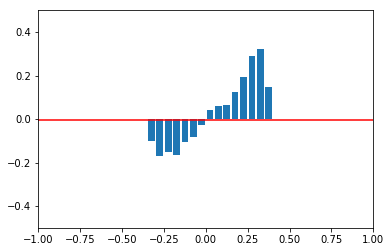

In [175]:
print(reg.score(X_test, y_test))
print(reg)
y_test_pred =reg.predict(X_test)

interval = 0.05
n = int(1/interval)
x0 = np.arange(n+1)*interval
y0 = np.ones(x0.shape)* y_test.mean()




y1 = []
cnt1 = []
for i in range(-n,n):
    p0 = i*interval
    p1 = (i+1)*interval
    cond=(p0 < y_test_pred) & (y_test_pred <=p1)
    cnt1.append(sum(cond))
    y1.append((y_test[cond].mean(), y_test[cond].median(),
               y_test[cond].std(),y_test[cond].max(),y_test[cond].min()))
for c,p in zip(cnt1,y1):
    print(c,p)

plt.bar(np.arange(-n,n)*interval+interval/2,[mean for mean,_, _,_,_ in y1],
        width=0.8*interval)

x0 = np.arange(-n,n+1)*interval
y0 = np.ones(x0.shape)* y_test.mean()
plt.plot(x0,y0,color='r')
# plt.plot(x,y1,color='r')
plt.xlim(-1,1)
plt.ylim(-0.5,0.5)
plt.show()


([<matplotlib.axis.XTick at 0x21425274fd0>,
 <a list of 10 Text xticklabel objects>)

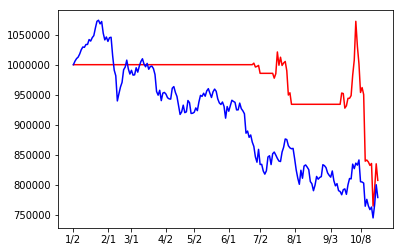

In [20]:
plt.figure()
line1 = plt.plot(dates,df_asset_values["my_model"],'r')
line2 = plt.plot(dates,df_asset_values["hs300"],'b')
ticks = [dates[dates>="2018-{:02d}-01".format(i)].min() for i in
              range(1,12) if (dates>="2018-{:02d}-01".format(i)).any()]
import datetime
labels = [datetime.datetime.strptime(t,"%Y-%m-%d").strftime("%#m/%#d") for t
          in 
          ticks]
plt.xticks(ticks,labels)